# Ella Serber

## Research question/interests
My primary research question asks: Is there a relationship between gender and personality traits?
    
 Hypothesis 1: There is a significant relationship between gender and personality traits. 

My secondary research question asks: How do scores between men and women differ on the 5 personality traits?
    
Hypothesis 2: Based on extant research, on average, women will show higher scores than men on Extraversion,          Agreeableness, and Neuroticism and there are will be no significant gender differences for Conscientiousness or Openness.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from random import randint

In [ ]:
dat_1 = pd.read_csv("../data/raw/data.csv", sep='\t')
dat_1

## EDA

In [ ]:
dat_1.shape
#Gives number of rows and columns

In [ ]:
dat_1.columns
#Gives all column names

In [ ]:
dat_1.head(5)
#Gives shortened dataframe for specified number of rows 

In [ ]:
dat_1.nunique(axis=0)
#Gives number of unique values for each column

In [ ]:
dat_1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#Descriptive stats for dataframe 
#Issues with age (why is mean 50767?)

In [ ]:
dat_1.age.unique()
#Gives each unique value for a column
#Not sure why there is a "99999999" value

In [ ]:
dat_2 = dat_1.copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
print(dat_2)
#Drop unwanted columns

In [ ]:
pd.isnull(dat_2).values.any()
#No missing values

In [ ]:
np.isnan(dat_2).values.any()
#No NaN values

In [ ]:
dat_2.loc[dat['E1'] == 0]
#How to do this for all columns at once? I.e., check for "0" in all columns

In [ ]:
pd.unique(dat["gender"])

#Need to remove gender = 0 (missing) and gender = 3 (other)

dat_2.loc[dat['gender'] == 0]
dat_2.loc[dat['gender'] == 3]
#How to drop these rows (without entering each manually)?

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

### Reverse Scoring

In [ ]:
#Reverse Scored Items: E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, A1, A3, A5, A7, C2, C4, C6, C8, O2, O4, O6

def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

dat = reverseScoring(dat_2, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])
dat

### Factor scores

In [ ]:
dat["E_Tot"] = dat["E1"]+dat["E2"]+dat["E3"]+dat["E4"]+dat["E5"]+dat["E6"]+dat["E7"]+dat["E8"]+dat["E9"]+dat["E10"]
dat["N_Tot"] = dat["N1"]+dat["N2"]+dat["N3"]+dat["N4"]+dat["N5"]+dat["N6"]+dat["N7"]+dat["N8"]+dat["N9"]+dat["N10"]
dat["A_Tot"] = dat["A1"]+dat["A2"]+dat["A3"]+dat["A4"]+dat["A5"]+dat["A6"]+dat["A7"]+dat["A8"]+dat["A9"]+dat["A10"]
dat["C_Tot"] = dat["C1"]+dat["C2"]+dat["C3"]+dat["C4"]+dat["C5"]+dat["C6"]+dat["C7"]+dat["C8"]+dat["C9"]+dat["C10"]
dat["O_Tot"] = dat["O1"]+dat["O2"]+dat["O3"]+dat["O4"]+dat["O5"]+dat["O6"]+dat["O7"]+dat["O8"]+dat["O9"]+dat["O10"]

dat

In [ ]:
print(dat.E1.describe())
print(dat.E_Tot.describe())
#descriptive stats for one column 

## Subsets

In [ ]:
dat_reduced_g = dat[["gender", "E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

dat_reduced = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

### Visualizations

array([[<AxesSubplot:title={'center':'O_Tot'}>]], dtype=object)

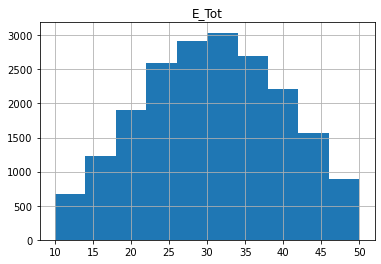

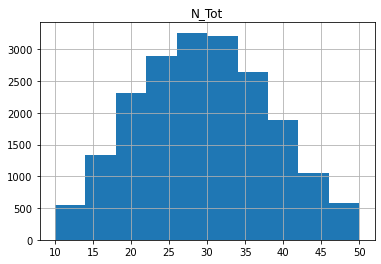

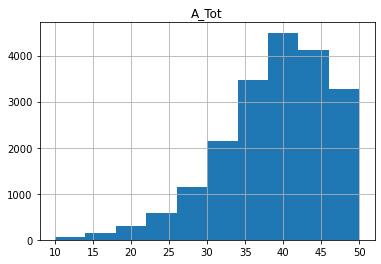

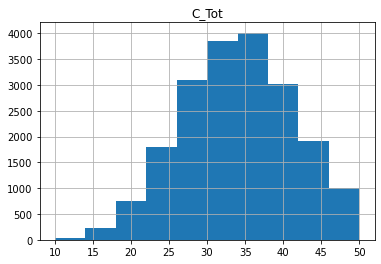

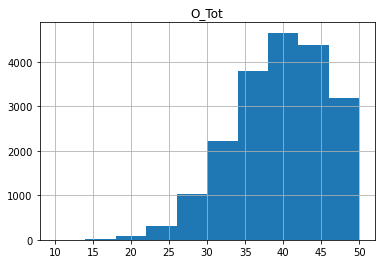

In [ ]:
dat.hist(column= "E_Tot")
dat.hist(column= "N_Tot")
dat.hist(column= "A_Tot")
dat.hist(column= "C_Tot")
dat.hist(column= "O_Tot")

#Use subsets and df_sub.hist() to get a combined plot with all 5

<AxesSubplot:>

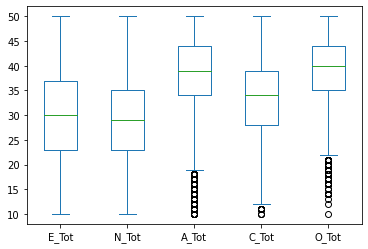

In [ ]:
dat_reduced.plot.box()

array([[<AxesSubplot:title={'center':'E_Tot'}>,
        <AxesSubplot:title={'center':'N_Tot'}>],
       [<AxesSubplot:title={'center':'A_Tot'}>,
        <AxesSubplot:title={'center':'C_Tot'}>],
       [<AxesSubplot:title={'center':'O_Tot'}>, <AxesSubplot:>]],
      dtype=object)

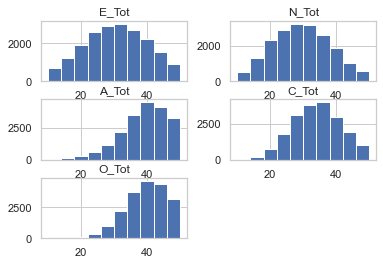

In [ ]:
dat_reduced.hist()

<AxesSubplot:xlabel='gender'>

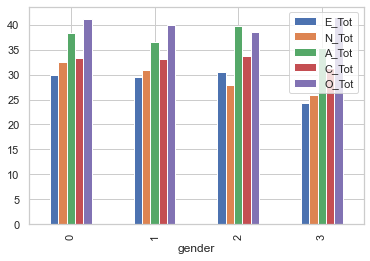

In [ ]:
dat_reduced_g.groupby("gender").mean().plot.bar()

<AxesSubplot:xlabel='gender'>

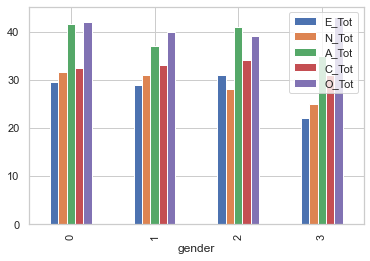

In [ ]:
dat_reduced_g.groupby("gender").median().plot.bar()

<AxesSubplot:>

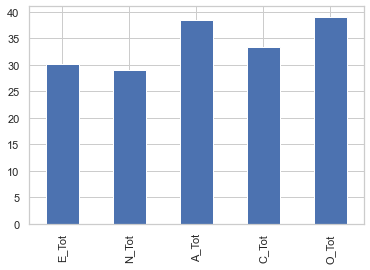

In [ ]:
dat_reduced.mean().plot.bar()

<AxesSubplot:xlabel='E_Avg', ylabel='gender'>

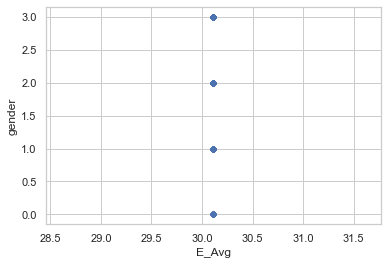

In [ ]:
dat.plot.scatter(x = "E_Avg", y = "")

In [ ]:
import matplotlib.pyplot as plt
sb.violinplot(x=["gender"], y= ["E_Tot"], data = dat)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Analysis Pipeline

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

## Load Data

In [ ]:
dat_1 = pd.read_csv("../data/raw/data.csv", sep='\t')

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


## Clean Data

In [ ]:
dat_2 = dat_1.copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
dat_3 = dat_2.copy().drop([19064], axis=0)

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,4,2,5,2,5,1,4,3,5,...,4,1,3,1,5,1,4,2,5,5
1,2,2,2,3,3,3,3,1,5,1,...,3,3,3,3,2,3,3,1,3,2
2,2,5,1,1,4,5,1,1,5,5,...,4,5,5,1,5,1,5,5,5,5
3,2,2,5,2,4,3,4,3,4,4,...,4,3,5,2,4,2,5,2,5,5
4,2,3,1,3,3,3,1,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2,1,4,3,5,4,3,1,2,1,...,1,3,5,3,4,1,4,2,5,3
19715,2,2,3,2,3,2,3,2,4,4,...,1,2,3,2,3,3,4,2,3,3
19716,1,2,5,4,5,5,5,1,2,1,...,5,3,1,3,4,1,1,5,5,5
19717,1,1,4,2,3,2,4,1,3,4,...,3,2,5,3,4,1,5,3,5,5


In [ ]:
##ADD STEP TO REMOVE ROWS WITH 0 OR 3 FOR GENDER

## Process Data


### Reverse Scoring

In [ ]:
def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

dat = reverseScoring(dat_3, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,4,4,5,4,5,5,4,3,5,...,4,5,3,5,5,5,4,2,5,5
1,2,2,4,3,3,3,3,1,1,1,...,3,3,3,3,2,3,3,1,3,2
2,2,5,5,1,2,5,5,1,1,5,...,4,1,5,5,5,5,5,5,5,5
3,2,2,1,2,2,3,2,3,2,4,...,4,3,5,4,4,4,5,2,5,5
4,2,3,5,3,3,3,5,3,5,3,...,3,5,1,5,3,5,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2,1,2,3,1,4,3,1,4,1,...,1,3,5,3,4,5,4,2,5,3
19715,2,2,3,2,3,2,3,2,2,4,...,1,4,3,4,3,3,4,2,3,3
19716,1,2,1,4,1,5,1,1,4,1,...,5,3,1,3,4,5,1,5,5,5
19717,1,1,2,2,3,2,2,1,3,4,...,3,4,5,3,4,5,5,3,5,5


### Create Factor Score Columns

In [ ]:
dat["E_Tot"] = dat["E1"]+dat["E2"]+dat["E3"]+dat["E4"]+dat["E5"]+dat["E6"]+dat["E7"]+dat["E8"]+dat["E9"]+dat["E10"]
dat["N_Tot"] = dat["N1"]+dat["N2"]+dat["N3"]+dat["N4"]+dat["N5"]+dat["N6"]+dat["N7"]+dat["N8"]+dat["N9"]+dat["N10"]
dat["A_Tot"] = dat["A1"]+dat["A2"]+dat["A3"]+dat["A4"]+dat["A5"]+dat["A6"]+dat["A7"]+dat["A8"]+dat["A9"]+dat["A10"]
dat["C_Tot"] = dat["C1"]+dat["C2"]+dat["C3"]+dat["C4"]+dat["C5"]+dat["C6"]+dat["C7"]+dat["C8"]+dat["C9"]+dat["C10"]
dat["O_Tot"] = dat["O1"]+dat["O2"]+dat["O3"]+dat["O4"]+dat["O5"]+dat["O6"]+dat["O7"]+dat["O8"]+dat["O9"]+dat["O10"]
dat

#Better way to do this? 

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
0,1,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
1,2,2,4,3,3,3,3,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,2,5,5,1,2,5,5,1,1,5,...,5,5,5,5,5,35,14,38,49,45
3,2,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,2,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,1,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


In [ ]:
E_Avg = sum(dat["E_Tot"])/len(dat)
A_Avg = sum(dat["A_Tot"])/len(dat)
N_Avg = sum(dat["N_Tot"])/len(dat)
C_Avg = sum(dat["C_Tot"])/len(dat)
O_Avg = sum(dat["O_Tot"])/len(dat)
#Total average (mean) for each factor

## Wrangle Data

In [ ]:
## Not sure what to put here -- I do not need to restructure the data or merge any new data

In [ ]:
dat_reduced_g = dat[["gender", "E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

dat_reduced = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

#Reduce dataset (create subsets) when only wanting total scores; with and without gender

<bound method hist_frame of        gender  E_Tot  N_Tot  A_Tot  C_Tot  O_Tot
0           1     44     49     46     47     43
1           2     22     29     35     42     26
2           2     35     14     38     49     45
3           2     22     17     37     26     41
4           2     34     30     44     34     34
...       ...    ...    ...    ...    ...    ...
19714       2     21     19     42     36     35
19715       2     25     39     36     32     30
19716       1     21     10     26     23     37
19717       1     21     20     38     43     42
19718       1     24     23     35     36     49

[19718 rows x 6 columns]>